# Steady-state light-intensity dependent JV simulation

In [6]:
import os, sys
try:
    import pySIMsalabim as sim
except ImportError: # add parent directory to sys.path if pySIMsalabim is not installed
    sys.path.append('..')
    import pySIMsalabim as sim
from pySIMsalabim.experiments.JV_steady_state import *

### Setup the simulation

In [7]:
# Set the path to the simulation setup file
cwd = os.path.abspath('..')
session_path = os.path.join(cwd, 'SIMsalabim','SimSS')
simss_device_parameters = os.path.join(session_path, 'simulation_setup.txt')

# Set the JV parameters
Gfrac = 1.0 # Fractions of the generation rate to simulate
UUID = str(uuid.uuid4())


# Run the JV simulation
ret, mess = run_SS_JV(simss_device_parameters, session_path, JV_file_name = 'JV.dat', varFile= 'Var.dat',G_fracs = [Gfrac], parallel = False, max_jobs = 3, UUID=UUID, cmd_pars=[{'par': 'l2.L', 'val': '400e-9'}])

print(ret)
print(mess)


0
All JV simulations completed successfully


### Plot results

Index(['Vext', 'Jext', 'errJ', 'Jint', 'JphotoL1', 'JphotoL2', 'JphotoL3',
       'JdirL1', 'JdirL2', 'JdirL3', 'JbulkL1', 'JbulkL2', 'JbulkL3',
       'JintL1L2', 'JintL2L3', 'JminLeft', 'JminRight', 'JShunt'],
      dtype='object')


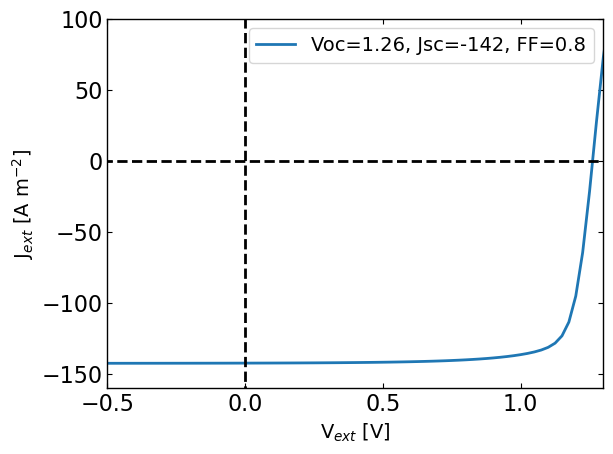

In [25]:
plt.figure()
data = pd.read_csv(os.path.join(session_path, f'JV_Gfrac_1.0_{UUID}.dat'), sep=r'\s+')
data2 = [float(x) for x in open(os.path.join(session_path, f"scPars_Gfrac_1.0_{UUID}.txt"), "r").readlines()[1].split()]
jsc, voc, ff, vmpp, mpp = data2[0], data2[2], data2[8], data2[4], data2[6]

print(data.keys())
plt.plot(data['Vext'], data['Jext'], label=f"Voc={voc:.2f}, Jsc={jsc:.0f}, FF={ff*100.0:.1f}%%")
plt.xlabel('V$_{ext}$ [V]')
plt.ylabel('J$_{ext}$ [A m$^{-2}$]')
plt.xlim([-0.5, 1.3])
plt.ylim([-160, 100])
plt.plot([-10, 10], [0, 0], "k--")
plt.plot([0, 0], [-1000.0, 1000.0], "k--")
plt.legend()
plt.show()


#for key in data.keys():
#    print(f"{key}: {data[key]}")

### Plot energy diagram from the input parameters

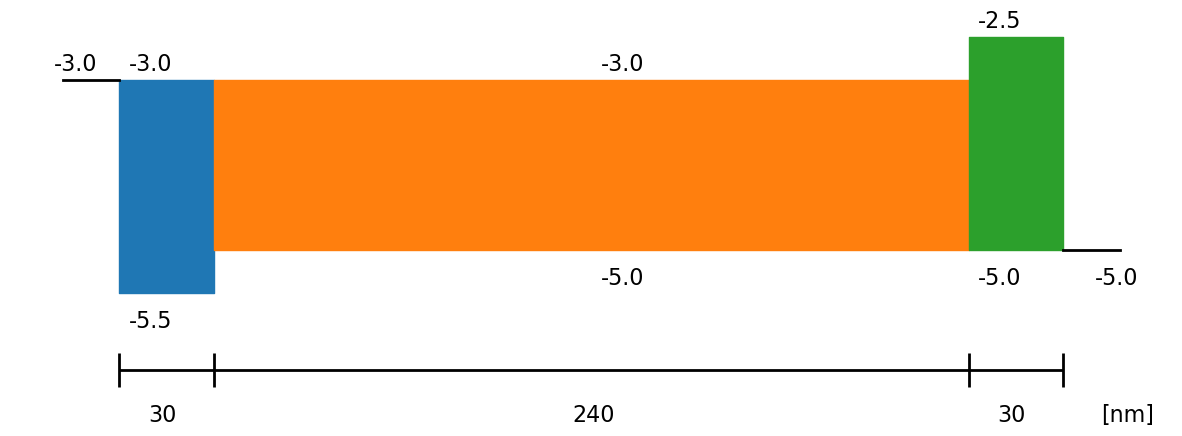

In [9]:
# Plot the energy band diagram of the input file
fig = sim.plot_band_diagram(simss_device_parameters, session_path)

In [16]:
# Clean up the output files (comment out if you want to keep the output files)
sim.clean_all_output(session_path)
sim.delete_folders('tmp',session_path)